
# Project 1: Investigating a Dataset - Brazilian Medical Appointment no-shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset is stored in a CSV file and holds information about 100k Brazilian patients and whether or not they attended their doctor's appointments. There are different types of information recorded relating to the patient's attendance (or lack thereof) and these are stored in columns as follows:

- Gender (male/female)
- Scheduled day (scheduled date of appointment by patient)
- Appointment day (actual appointment date)
- Age (age of patient)
- Neighbourhood (location of the hospital)
- Scholarship (whether or not the patient is registered for Brazilian Welfare)
- Hypertension and other ailments (Binary indication of whether the patient suffers from the condition labelled)
- SMS received (No- no notification received for appointment, Yes- notification received)
- No show (No- patient attended, Yes- patient didn't attend)


### Question(s) for Analysis

This is an interesting dataset which will aid this analysis in extracting insights into the possible reasons patients miss their medical appointments.

**How does the age of the patient affect their attendance?**
- This question will require a distribution of the ages of all the patients and how many patients at each age failed to attend their appointment.

**Does the location of the hospital affect patient appointment attendance?**
- Comparing the total non-attendees for each hospital will answer this and give an indication of the best and worst hospitals for patient attendance.

**Does the SMS reminder improve patient appointement attendance?**
- Patients should receive SMS reminders for their appointments, should they consent. An analysis of the patients who received SMSs and didn't show compared to those who didn't receive SMSs and didn't show will answer this question.

In [1]:
#importing all needed packages for project (numpy,pandas and matplotlib)

import numpy as np  
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns #using seaborn to improve plot resolutions
#inline statement for matplotlib visualisations show in cells
% matplotlib inline 

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0
#!pip install --upgrade ipykernel==5.1.2

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will upload the selected dataset, familiarise myself with the data using the head, shape, describe and info functions. This will aid me in checking the dataset for cleanliness and proceeding to trim and clean the dataset for analysis, where necessary. 


### General Properties

In [3]:
#viewing current working directory - this was added as I was struggling to read in my csv below
import os
os.getcwd()

'/home/workspace'

In [4]:
# Imports and uploading data and 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#printing out the top lines.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We need a better understanding of the shape of the dataframe as well as the types of values contained in it.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset is quite clean already; with no missing values and the data types of each column being as expected. There are also a full compliment of rows for each column.

It is however imperative that we check for duplicates.

In [6]:
#using sum function to check the number of duplicated rows
sum(df.duplicated())

0

There are no duplicates in the dataset.

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Dataset overview

The dataset is a csv file with 14 columns and 110527 entries (rows), which each detail the information of patients who either arrived for their medical appointment or didn't. This is an interesting dataset with predominantly 1's and 0's (binary indicators) denoting whether or not the patient suffers from the ailment in the column. 

The table has no empty entries and therefore will not require any filling however the 'No-show' entries should be dealt with carefully as they encode the patients'attendance.

There are also two outliers or entries that could pose problems:
1. The minimum age is -1 which is impossible. This entry should be dropped, along with any other age entry lower than 0.
2. The maximum age is 115 and the patient has a handicap entry of 4 instead of 1 or 0. In the interest of having data that is as clean as possible, this entry will be dropped as well.
3. While this doesn't affect my questions and analysis it is good practice to have all variables in the dataframe be of the correct type. The dates and times under the 'ScheduledDay' and 'AppointmentDay' columns are stored as strings and should be converted to the date-time type.




### Data Cleaning


Whilst analysing the dataset it was found that the minimum age is -1 which is impossible. This entry should be dropped, along with any other age entry lower than 0. It was also found that the individual who was 115 years of age had a entry of 4 under the Handicap column which doesn't fit the binary standard in the rest of the dataset (i.e 1-Yes, 0-No).

In [8]:
#dropping all rows where age is less than 0
df.drop(df[df.Age<0].index, inplace=True)
#dropping all rows where handicap is greater than 1
df.drop(df[df.Handcap>1].index, inplace=True)
#verify cleaning
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We'll also need to ensure that the scheduled and appointment days are date time objects and not strings.

In [9]:
#changing variable type of scheduled day
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
#changing variable type of appointment day
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [10]:
#checking the dataframe for correct changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110327 non-null float64
AppointmentID     110327 non-null int64
Gender            110327 non-null object
ScheduledDay      110327 non-null datetime64[ns, UTC]
AppointmentDay    110327 non-null datetime64[ns, UTC]
Age               110327 non-null int64
Neighbourhood     110327 non-null object
Scholarship       110327 non-null int64
Hipertension      110327 non-null int64
Diabetes          110327 non-null int64
Alcoholism        110327 non-null int64
Handcap           110327 non-null int64
SMS_received      110327 non-null int64
No-show           110327 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa71f3bd2e8>,
      dtype=object)

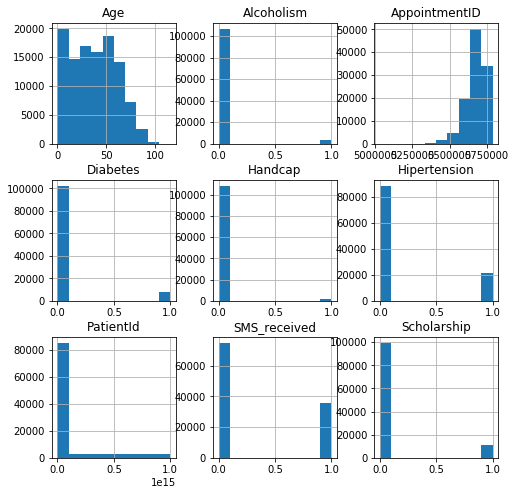

In [11]:
df.hist(figsize=(8,8))

The cleaning was successful. 

The above chart provides a rough visualisation of the final dataframe to be analysed. It is interesting to note that the sample population has a young average age with a distribution that is skewed right. This is inline with what is expected as developing countries world-wide show this trend and Brazil is an example of a developing nation.

<a id='eda'></a>
## Exploratory Data Analysis


### How does the age of the patient affect their attendance?

Adults and the elderly are often more likely to fall ill than younger people so it would be fair to presume this group within the population would have a higher proportional attendance for their appointments than younger patients in the population. This assumption is investigated using transposed histograms to show the differences in the distributions and pie charts to confirm proportionality.

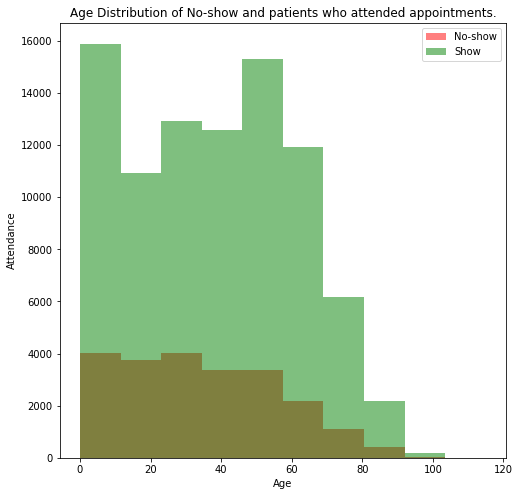

In [12]:
#Masks for no show and patients and patients who showed up (show)
no_show = df[df['No-show']=='Yes']
show = df[df['No-show']=='No']

#set plot for no show and show charts called age
fig, age = plt.subplots(figsize=(8,8))
#plot histograms on age of the ages of the no show and show patients 
#alpha = transparency so we can see one ontop of the other
#label gives label to each hist on chart and corresponding color is assigned to each histogram
age.hist(no_show['Age'], alpha=0.5, label='No-show', color='red')
age.hist(show['Age'], alpha=0.5, label='Show', color='green')
#set title for chart
age.set_title('Age Distribution of No-show and patients who attended appointments.')
#set x and y axis labels
age.set_xlabel('Age')
age.set_ylabel('Attendance')
#set legend location
age.legend(loc='upper right')
#show plot
plt.show();

The following insights can be observed through this initial visulisation:

- The age groups with the best attendance include: young children (ages 0-15) and pre-retirement adults (ages 35-65)
- The bulk of no shows comes from patients younger than 60 years old.

Let's investigate this further by assessing proportionality for each age group within the 'no-show' and 'show' subsets.

In [24]:
#creating mask for younger than 60 age group in no shows
no_u60 = no_show[no_show['Age']<60]
#creating mask for over 60 age group in no shows
no_ov60 = no_show[no_show['Age']>=60]

#a function for calculating and returning the sizes of each slice of a pie chart given the masks containing
#the data for each slice and the data representing the population or total values for the chart
def pie_slice_2 (mask1,mask2,mask3):
    #calculate total number of occurences for mask 1
    total_slice1=len(mask1)
    #calculate total number of occurences for mask 2
    total_slice2=len(mask2)
    #calculate total number of entries for population mask
    total_population=len(mask3)
   #create variable and calculate size for first slice in pie chart
    size_slice1 = (total_slice1/total_population)*100
    #create variable and calculate size for second slice in pie chart
    size_slice2 = (total_slice2/total_population)*100 
    slice_list = [size_slice1,size_slice2]
    
    return slice_list


Now that the variables have been set, a pie chart can be plotted.

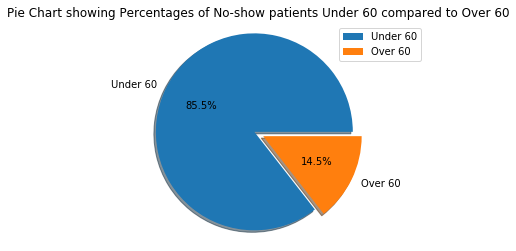

In [26]:
x = pie_slice_2 (no_u60,no_ov60,no_show)
#set label names for pie chart slices
labels = 'Under 60', 'Over 60'
# set sizes of slices for corresponding labels 
sizes = [x[0], x[1]]
# explodes under 60 slice for emphasis
explode = (0.1,0)
#use matplotlib.pyplot to create sublot for chart and set plot parameters
fig1, p1 = plt.subplots()
p1.pie(sizes, labels=labels, autopct='%1.1f%%',explode=explode, shadow =True, startangle = 0)
#set title of pie chart
plt.title('Pie Chart showing Percentages of No-show patients Under 60 compared to Over 60')
#set legend for data labels
plt.legend()
#axis set to equal to ensure pie chart is plotted as perfect circle
p1.axis('equal')
#show plot
plt.show()

To prove that patients over 60 years old had proportionaly better attendance for their medical appointments than their younger counterparts we must check the corresponding percentages that these two groups represent in the total population.

In [27]:
#creating mask for younger than 60 age group in no shows
u60 = df[df['Age']<60]
#creating mask for over 60 age group in no shows
ov60 = df[df['Age']>=60]

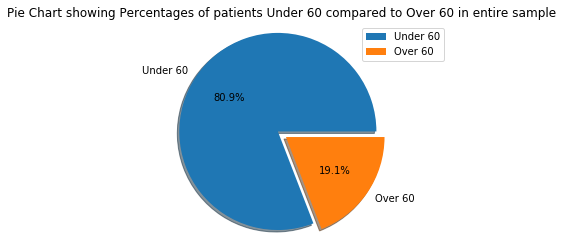

In [28]:
y=pie_slice_2(u60,ov60,df)
#set label names for pie chart slices
labels = 'Under 60', 'Over 60'
# set sizes of slices for corresponding labels 
total_sizes = [y[0], y[1]]
# explodes under 60 slice for emphasis
explode = (0.1,0)
#matplotlib.pyplot to create sublot for chart and set plot parameters
fig1, p1 = plt.subplots()
p1.pie(total_sizes, labels=labels, autopct='%1.1f%%',explode=explode, shadow =True, startangle = 0)
#set title of pie chart
plt.title('Pie Chart showing Percentages of patients Under 60 compared to Over 60 in entire sample')
#set legend for data labels
plt.legend()
#axis set to equal to ensure pie chart is plotted as perfect circle
p1.axis('equal')
#show plot
plt.show()

It is clear from the pie chart above that the 'Over 60' age group attended proportionally more of their medical appointments, since the under 60 age group accounted for a greater percentage of 'no-shows' than their percentage of the total sample population. Thereby confirming that patients over 60 years of age did indeed attend more of their medical appointments.

### Does the location of the hospital affect patient appointment attendance?

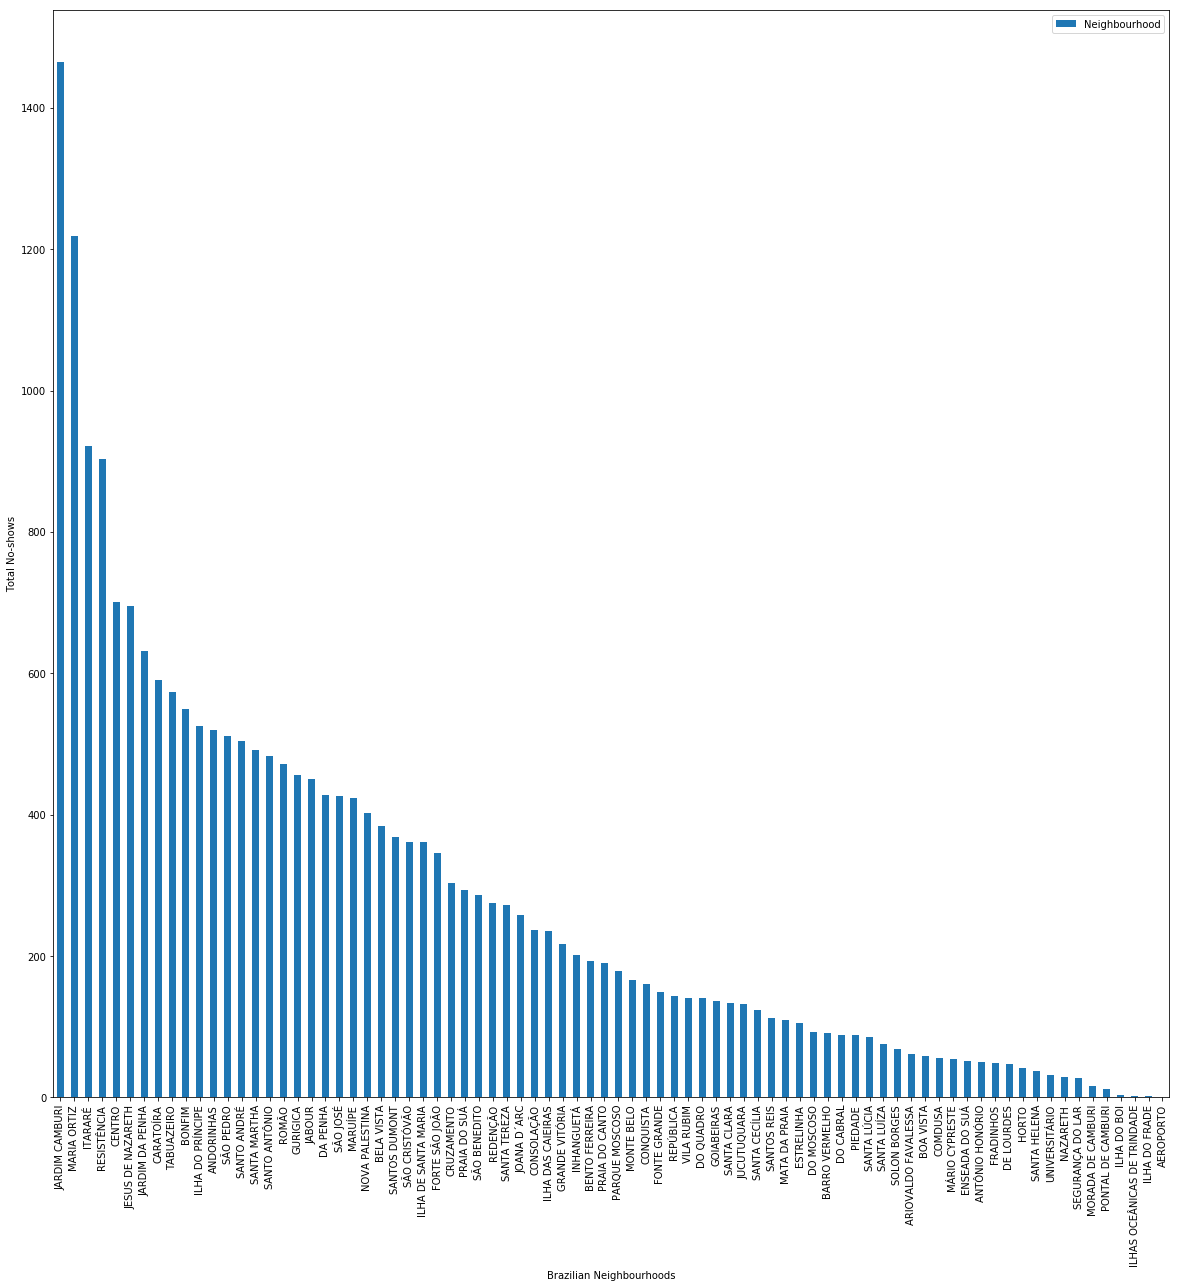

In [17]:
#create bar plot of total no shows for each neighbourhood
bar0=no_show['Neighbourhood'].value_counts().plot(x = no_show['Neighbourhood'], kind='bar',figsize=(20,20), colour=)
#set x-axis label
bar0.set_xlabel('Brazilian Neighbourhoods')
#set y-axis label
bar0.set_ylabel('Total No-shows')
#set legend for data labels
plt.legend()
#show plot
plt.show();

The above bar chart shows that a select few neighbourhoods had far more no shows than others, namely; Jardim Camburi, Maria Ortiz, Itararé, Resisténcia, Centro, Jesus De Nazareth and Jardim Da Penha. This will be discussed further in the conclusions.

### Does the SMS reminder improve patient appointement attendance?

The SMS reminder is a convenient way to remind a person of their appointment date and time; but is it truly effective? This will be tested by grouping the dataframe into patients who received an SMS reminder and those who didn't, thereafter the number of 'no-shows' and 'shows' will be compared for each group.

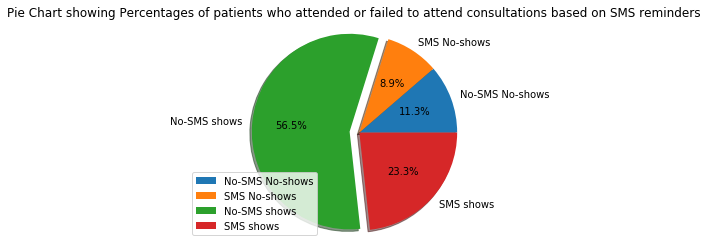

In [18]:
#Masks for patients who reported receiving sms reminders and for those who reported not receiving the reminder
no_sms = df[df['SMS_received']==0]
sms = df[df['SMS_received']==1]

#calculate total number of patients who received sms' and total of those who didn't
total_no_sms = len(no_sms)
total_sms = len(sms)

#create masks for patients who did't receive sms' and either didn't show (ns) or did (s)
no_sms_ns = no_sms[no_sms['No-show']=='Yes']
no_sms_s = no_sms[no_sms['No-show']=='No']

#create masks for patients who did receive sms' and either didn't show (ns) or did (s)
sms_ns = sms[sms['No-show']=='Yes']
sms_s = sms[sms['No-show']=='No']

#create variable for total number of no sms received no shows
nn=len(no_sms_ns)
#create variable for total number of sms received no shows
rn=len(sms_ns)
#create variable for total number of no sms received shows
ns=len(no_sms_s)
#create variable for total number of sms received no shows
rs=len(sms_s)

#create variable for size no sms received no shows in pie chart
size_nn = (nn/total_patients)*100
#create variable for size sms received no shows in pie chart
size_rn = (rn/total_patients)*100
#create variable for size no sms received shows in pie chart
size_ns = (ns/total_patients)*100
#create variable for size sms received shows in pie chart
size_rs = (rs/total_patients)*100

#plotting the pie chart

#set label names for pie chart slices
labels_sms = 'No-SMS No-shows', 'SMS No-shows', 'No-SMS shows', 'SMS shows'
# set sizes of slices for corresponding labels 
total_sizes_sms = [size_nn, size_rn, size_ns, size_rs]
# explodes 'No-sms shows' slice for emphasis
explode = (0,0,0.1,0)
#matplotlib.pyplot to create sublot for chart and set plot parameters
fig2, p2 = plt.subplots()
p2.pie(total_sizes_sms, labels=labels_sms, autopct='%1.1f%%',explode=explode, shadow =True, startangle = 0)
#set title of pie chart
plt.title('Pie Chart showing Percentages of patients who attended or failed to attend consultations based on SMS reminders')
#set legend for data labels
plt.legend(loc='lower left')
#axis set to equal to ensure pie chart is plotted as perfect circle
p2.axis('equal')
#show plot
plt.show()


The pie chart above shows that the majority of patients in the sample population actually didn't receive SMSs but still arrived for their consultations which is surprising. The pie chart also shows that there is only a 2.4% difference in the number of patients who didn't receive SMS reminders, and didn't show up, and those who did show up for their consultations.

<a id='conclusions'></a>
## Conclusions


This analysis showed the following about the selected dataset:

- Proportionally more Brazilian patients who were over 60 years of age attended their medical consultations than patients under the age of 60. This could be due to older patients being more concious of their health, as they fall ill more often, thereby making more of an effort to avoid missing out on getting the treatment they need. Confirming this would require a futher study into the sentiments of Brazilian patients and possibly a survey investigating the reasons for missing a consultation. 

- A google search of some of the neighbourhoods in the dataframe indicated that the majority are located in Vitória - State of Espírito Santo. The neighbourhoods with the highest number of no shows seem to be located close to or in city centres whereas one of the cities with the lowest number of no-shows (Ilha Do Frade) is actually a small island off the coast of Vitória Brazil. This island would presumably have a much smaller population than that of a neighbourhood near a city centre. This insight also therefore reveals a limitation of the analysis.

- SMS reminders for patients regarding their consultation dates and times had little significant effect on the proportion of patients who attended or failed to attend their consultations. This was surprising, moreover, the vast majority of patients in the sample population didn't receive SMSs at all. 

### Limitations

- Confirming the conclusion made in the first point would require a futher study into the sentiments of Brazilian patients and possibly a survey investigating the reasons for missing a consultation. The data is not extensive enough to show why older patients attended more of their medical appointments.

- The analysis showed that there were more appointment No-shows at hospitals in certain neighbourhoods however these neighbourhoods have varying locations such as near city centres or on secluded islands; without data on the populations of each of the neighbourhoods to proportionaly compare appointment attendance, the analysis for this question remains speculative. This is because the attendance rates could very well be inline with the relative population sizes.

- Finally, the basis of this analysis and its conclusions is observations of proportionality in the data, which could be used to find probabilities within the sample space for different events eg. a patient not showing up to a consultation, however this was not done for time and scope reasons. Therefore none of the conclusions are statistical in nature.


In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0